<Figure size 1000x600 with 0 Axes>

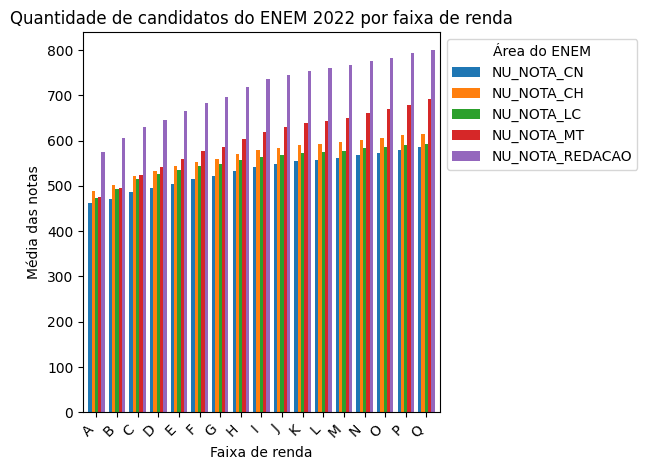

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Dados\MICRODADOS_ENEM_2022.csv', sep= ';', encoding= 'ISO-8859-1')
filtro_treineiro = df['IN_TREINEIRO'] == 0
filtro_presenca_CN = df['TP_PRESENCA_CN'] == 1
filtro_presenca_CH = df['TP_PRESENCA_CH'] == 1
filtro_presenca_LC = df['TP_PRESENCA_LC'] == 1
filtro_presenca_MT = df['TP_PRESENCA_MT'] == 1
filtro_redacao= df['TP_STATUS_REDACAO'] == 1


filtros_agrupados = filtro_treineiro & filtro_presenca_CN & filtro_presenca_CH & filtro_presenca_LC & filtro_presenca_MT & filtro_redacao
df_filtrado = df[filtros_agrupados]


# agrupa por tipo (nesse caso pela renda) e faz a média das notas de cada competência, ai o gráfico fica renda por média de nota em cada competência
media_notas_por_renda = df_filtrado.groupby('Q006')[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']].mean()

plt.style.use('default')
plt.figure(figsize=(10, 6))
media_notas_por_renda.plot(kind='bar', width=0.8)
plt.xlabel('Faixa de renda')
plt.ylabel('Média das notas')
plt.title('Quantidade de candidatos do ENEM 2022 por faixa de renda')
plt.legend(title='Área do ENEM', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45, ha='right')
plt.tight_layout() 
plt.show()
